# DESENVOLVIMENTO DA INICIAÇÃO CIENTÍFICA 

# BASE DE DADOS DE 2024

# Preparação do ambiente

In [ ]:
pip install  matplotlib numpy pandas seaborn scikit-learn seaborn

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

# Carregamento da base de dados

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/EduardoMiranda06/Ciencia-de-Dados-----SENAI/refs/heads/main/dados24.csv')

# Primeiras visualizações e inspeções de dados

In [16]:
df.head() # mostra as 5 primeiras linhas | usado para conferir se o arquivo foi lido corretamente

df.info() # aqui verificamos nome das colunas, tipo de dado (int, float, object), quantidade de valores não nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           244 non-null    int64  
 1   diametro     244 non-null    float64
 2   altura       244 non-null    float64
 3   massa        244 non-null    float64
 4   resistencia  244 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 9.7+ KB


In [17]:
df["resistencia"].value_counts(dropna=False) # df["resistencia"] seleciona a coluna "resistencia"
                                             # value_counts() conta valores repetidos
                                             # dropna=False inclui valores nulos (NaN)

# Objetivo é visualizar : números válidos,strings como "FALHA",valores ausentes

resistencia
0      10
580     3
564     3
464     3
560     3
       ..
701     1
660     1
676     1
595     1
735     1
Name: count, Length: 174, dtype: int64

In [18]:
# Lidando com falhas e valores nulos na variável "resistencia"

df["falha_ensaio"] = df["resistencia"].astype(str).str.upper().str.contains("FALHA")
df["falha_ensaio"] = df["falha_ensaio"].fillna(False)
df["falha_ensaio"] = df["falha_ensaio"].astype(int)

# astype(str) -> transforma todos os valores em texto
# .str.upper() -> coloca o texto em maiúsculo, padronizando
# .str.contains("FALHA") -> retorna True se o texto contém a palavra e false caso contrário
# .fillna(False) -> ubstitui valores nulos por False
# .astype(int) -> atribui True a 1 e False a 0

In [19]:
df["resistencia"] = pd.to_numeric(df["resistencia"], errors="coerce")

# pd.to_numeric() -> tenta converter texto em número
# errors="coerce" -> caso o anterior der erro, o torna NaN

# Explicação : Dessa forma, as "FALHAS" na variável "resistencia", se tornam NaN
# NaN = Not a Number

In [20]:
df.isnull().sum() # Conta quantas vezes aparecem valores nulos nas variáveis


ID              0
diametro        0
altura          0
massa           0
resistencia     2
falha_ensaio    0
dtype: int64

In [21]:
# Lidando com as falhas na variável "resistencia"

df_validos = df[df["falha_ensaio"] == 0].copy()
df_falha_total = df[df["falha_ensaio"] == 1].copy() 

# df["falha_ensaio"] == 0 -> cria uma condição lógica
# df[...] -> filtra apenas as linhas que satisfazem
# .copy() -> cria uma cópia independente

# Explicação : Fizemos isso para trabalharmos com dois conjuntos, os válidos e as falhas


# Análise Exploratória

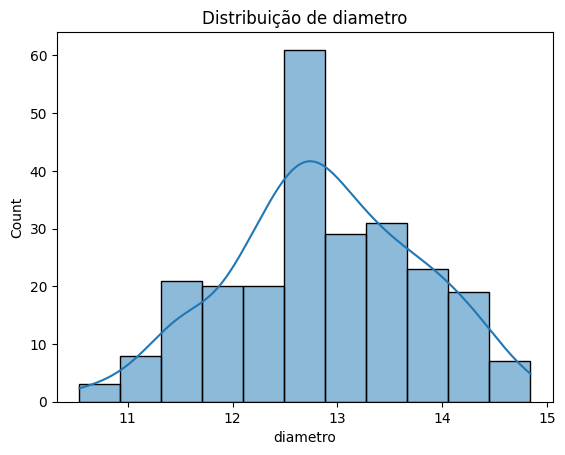

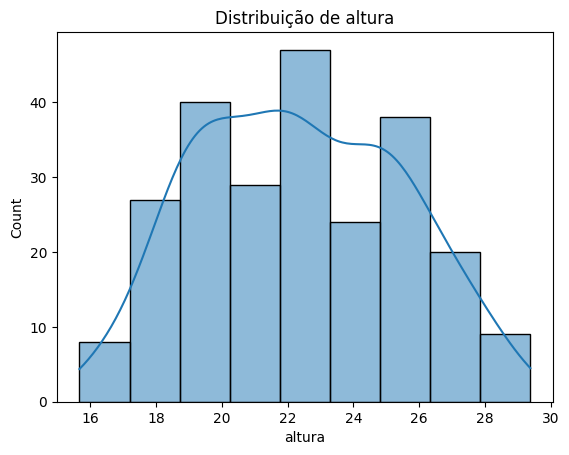

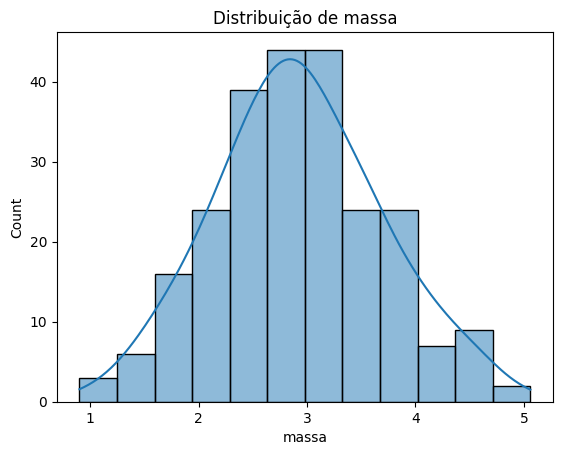

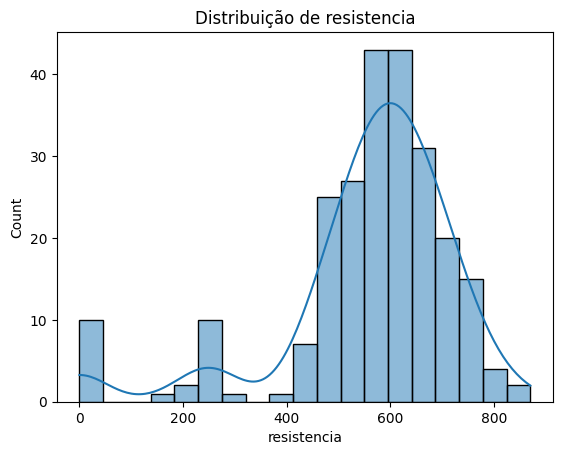

In [22]:
variaveis = ["diametro", "altura", "massa", "resistencia"]

for var in variaveis:
    sns.histplot(df_validos[var], kde=True)
    plt.title(f"Distribuição de {var}")
    plt.show()

# histplot() -> cria um histograma
# kde=True -> adiciona curva suavizada
# plt.show() -> exibe o gráfico

# Boxplots

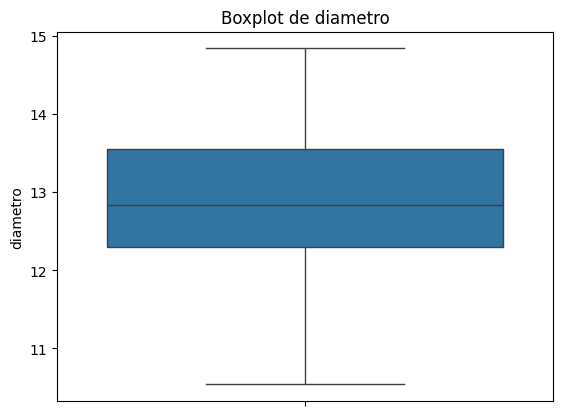

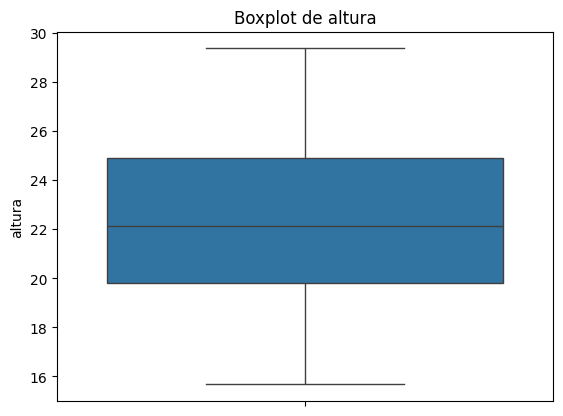

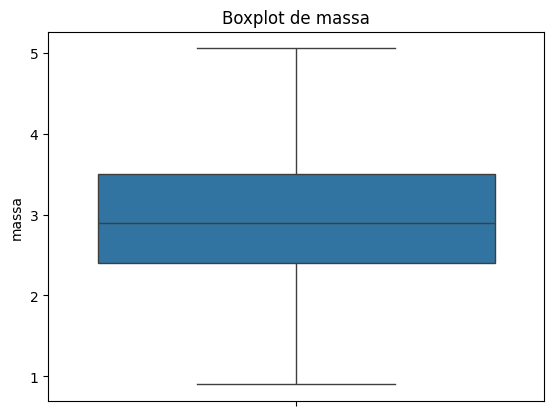

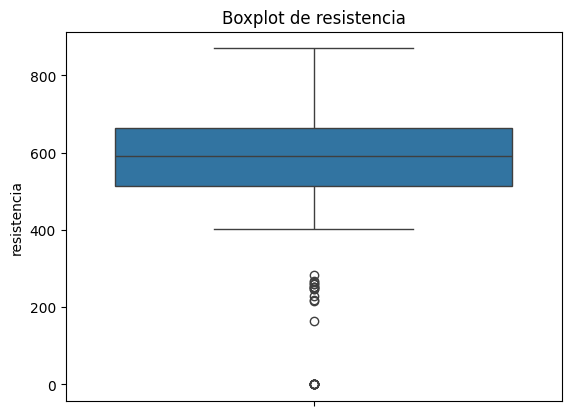

In [23]:
for var in variaveis:
    sns.boxplot(y=df_validos[var])
    plt.title(f"Boxplot de {var}")
    plt.show()

# Relembrando : Boxplot evidencia mediana,quartis e outliers    

# Matriz de Correlação

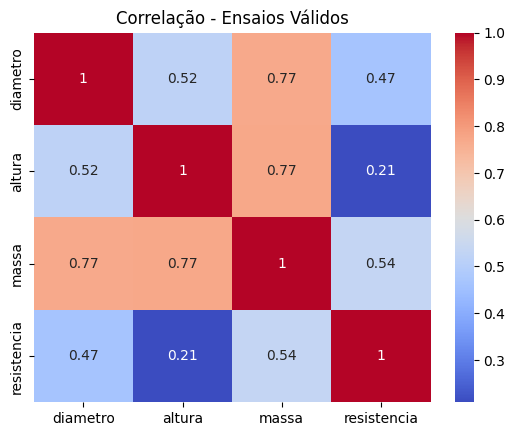

In [ ]:
corr = df_validos[variaveis].corr() #.corr() -> Calcula correlação de Pearson

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlação - Ensaios Válidos") # Define o Título
plt.show() # Plota a imagem / permite a visualização

# annot=True -> escreve os valores no gráfico
# cmap -> define cores

# Regressão Linear

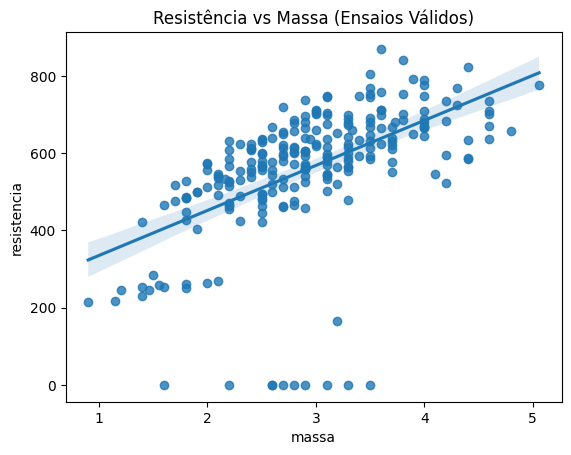

In [25]:
sns.regplot(x="massa", y="resistencia", data=df_validos)
plt.title("Resistência vs Massa (Ensaios Válidos)")
plt.show() 

# regplot(): cria scatter plot e ajusta uma linha de regressão automaticamente

# Análise de Resíduos

In [26]:
coef = np.polyfit(df_validos["massa"], df_validos["resistencia"], 1) # np.polyfit() ajusta um polinômio e o "1" indica que é um polinômio de grau 1
pred = np.polyval(coef, df_validos["massa"]) # calcula os valores previstos pela reta

df_validos["residuo"] = df_validos["resistencia"] - pred # cria uma nova coluna com a diferença real - previsto

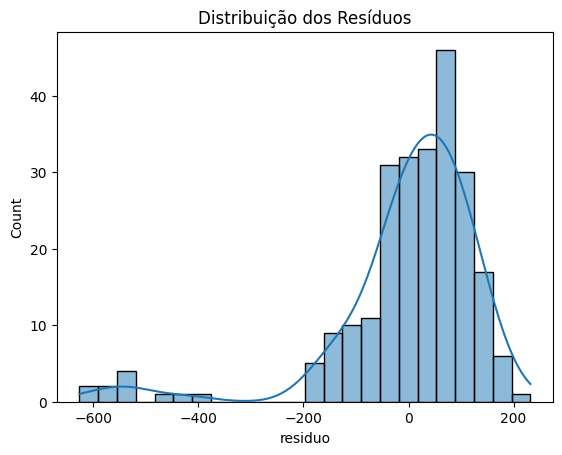

In [ ]:
sns.histplot(df_validos["residuo"], kde=True)
plt.title("Distribuição dos Resíduos")
plt.show()

# df_validos["residuo"] -> seleciona a coluna chamada residuo do DataFrame | cada valor é um número que representa o erro da regressão
# sns.histplot(...) -> cria um histograma | cada barra representa a quantidade de resíduos em um intervalo
# kde=True -> adiciona uma curva suave (Kernel Density Estimation) | ajuda a visualizar a forma geral da distribuição

# Explicação : Isso tudo serve para entender se os resíduos estão centrados em zero,ver se há muitos resíduos negativos extremos,identificar assimetria, que sugere defeitos recorrentes

# Lidando com os atributos 

In [ ]:
df_validos["volume"] = np.pi * (df_validos["diametro"]/2)**2 * df_validos["altura"] # Calcula o volume do cilindro de PLA
df_validos["densidade_aparente"] = df_validos["massa"] / df_validos["volume"] # Cria nova coluna com divisão de elementos
df_validos["resistencia_especifica"] = df_validos["resistencia"] / df_validos["massa"]

# df_validos["resistencia"] -> série com valores de resistência
# df_validos["massa"] -> série com valores de massa
# a divisão / -> ocorre elemento a elemento | linha 1 divide por linha 1, linha 2 por linha 2, etc.
# df_validos["resistencia_especifica"] = cria uma nova coluna no DataFrame

#Explicações : Isso tudo gera uma variável normalizada pela massa e permite comparar peças de tamanhos diferentes

# APRENDIZADO SUPERVISIONADO

In [ ]:
limiar = df_validos["resistencia"].quantile(0.20)

# .quantile(0.20) -> retorna o valor abaixo do qual estão 20% dos dados, é o percentil 20
# limiar -> variável que guarda esse valor numérico


# Explicações : Isso mostra que 20% das peças têm resistência menor que esse valor,cria um critério objetivo para “resistência baixa”

df_validos["defeito"] = (df_validos["resistencia"] < limiar).astype(int)

# df_validos["resistencia"] < limiar -> gera uma série booleana : True se a resistência é menor que o limiar,False caso contrário
# .astype(int) -> converte para True -> 1 False -> 0
# df_validos["defeito"] = -> salva o resultado como nova coluna

#Explicações : Isso tudo para 1 = peça considerada defeituosa e 0 = peça considerada normal

In [ ]:
df_falha_total["defeito"] = 1

# cria a coluna "defeito" no DataFrame "df_falha_total" e atribui valor 1 para todas as linhas
# Para que assim toda falha total é automaticamente um defeito confirmado

In [ ]:
df_ml = pd.concat([df_validos, df_falha_total], axis=0)

# pd.concat([...]) -> junta DataFrames
# [df_validos, df_falha_total] -> lista de DataFrames a serem unidos
# axis=0 -> empilha linhas, um DataFrame vai abaixo do outro

# Objetivo : Um único DataFrame contendo ensaios válidos e falhas totais

# Preparação dos dados para ML

In [ ]:
features = [
    "diametro",
    "altura",
    "massa",
    "densidade_aparente"
]

# Aqui criamos uma lista de strings, onde cada string é o nome de uma coluna, funciona como um "manual" de variáveis para a entrada no modelo

X = df_ml[features] # seleciona apenas as colunas listadas e vira a matriz de entrada do modelo
y = df_ml["defeito"] # vira o vetor de saída (rótulo)

In [ ]:
X = X.fillna(X.median())

# X.median() -> calcula a mediana de cada coluna e retorna uma série com uma mediana por variável
# X.fillna(...) -> substitui valores NaN, assim cada coluna recebe sua própria mediana

# Utilizamos mediana por ser menos sensível a outliers e mais robusta que a média

# Treinamento supervisionado

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# test_size=0.3 -> É um parâmetro onde 30% dos dados vão para teste
# random_state=42 -> É um parâmetro que garante que a divisão seja sempre a mesma 
# Explicação: Divide os dados em dois conjuntos, 70% treino, 30% teste

In [ ]:
# SVM
svm = SVC()
svm.fit(X_train, y_train)

# SVC() -> Cria um classificador SVM com parâmetros padrão
# .fit(X_train, y_train) -> Ajusta o modelo aos dados e prende padrões que separam defeito e não defeito

y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

# .predict(X_test) -> Gera previsões para dados nunca vistos
# classification_report -> mostra: precisão, recall, f1-score, suporte

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        57
           1       0.00      0.00      0.00        17

    accuracy                           0.77        74
   macro avg       0.39      0.50      0.44        74
weighted avg       0.59      0.77      0.67        74



c:\Users\edumi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\edumi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\edumi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [ ]:
# Árvore de Decisão

dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

# max_depth=4 -> Limita o tamanho da árvore, evitando overfitting (quando um modelo de inteligência artificial ou estatística aprende "bem demais" os dados de treinamento, decorando detalhes e ruídos (erros aleatórios), em vez de aprender o padrão geral. )
# .fit(...) -> aprende regras do tipo: se densidade < X e massa < Y → defeito

y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91        57
           1       0.71      0.59      0.65        17

    accuracy                           0.85        74
   macro avg       0.80      0.76      0.78        74
weighted avg       0.84      0.85      0.85        74



# Aprendizado não supervisionado

In [ ]:
# Padronização

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# fit_transform(): -> Aprende a média e desvio padrão, também aplica a padronização


In [ ]:
# Isolation Forest

iso = IsolationForest(
    contamination=0.15,
    random_state=42
)

# contamination define a fração esperada de anomalias
# random_state garante reprodutibilidade 

df_ml["anomalia"] = iso.fit_predict(X_scaled)

# fit_predict() -> Treina o modelo e retorna 1 = normal | -1 = anomalia

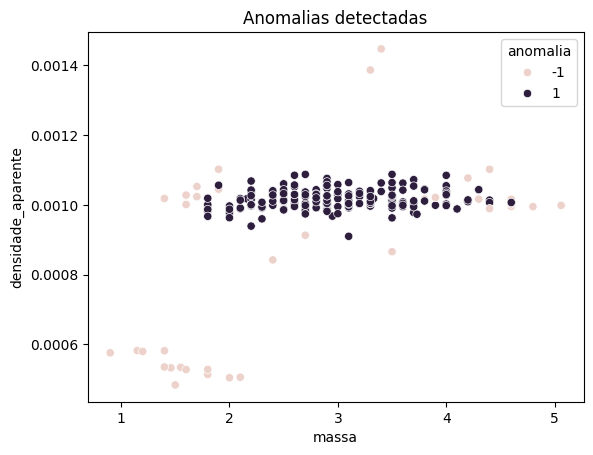

In [ ]:
# Visualização de anomalias

sns.scatterplot(
    x=df_ml["massa"],
    y=df_ml["densidade_aparente"],
    hue=df_ml["anomalia"]
)
plt.title("Anomalias detectadas")
plt.show()

# hue -> Colore os pontos | 1 = normal e -1 = anomalia
# Explicações : Aqui, cada ponto é um cilindro, eixo x = massa, eixo y = densidade aparente

# Encontrando IDs suspeitos

In [ ]:
#Criação da coluna de "suspeito"

df_ml["suspeito"] = np.where(
    (df_ml["falha_ensaio"] == 1) | (df_ml["anomalia"] == -1),
    1,
    0
)

# np.where(condição, valor_se_true, valor_se_false) se a condição for verdadeira = 1 senão = 0

# Explicação : Marca como suspeito quem falhou no ensaio ou foi anomalia

In [ ]:
ids_suspeitos = df_ml[df_ml["suspeito"] == 1]["ID"] # Filtra apenas ou outliers e os seleciona na coluna ID
ids_suspeitos

# df_ml["suspeito"] == 1 -> Funciona como um filtro
# df_ml[...] -> Aplica o filtro
# ["ID"] -> seleciona apenas a coluna ID

21     251
37     242
44     250
46     195
49      19
52     260
56     252
61     138
62     243
77      85
80       3
89     226
109    263
114    262
123    231
124    240
128     47
129    248
135    246
139    249
144    255
145      1
161    148
162    234
164    245
165    258
166    259
170      7
188    247
189    253
190    256
191    257
197    261
212      2
214     10
215      4
243    254
198     57
211     91
Name: ID, dtype: int64

In [ ]:
df_ml[df_ml["suspeito"] == 1].to_csv(
    "IDs Suspeitos24.csv",
    index=False
)

# index=False -> evita salvar o índice do DataFrame

# Explicações : Isso filtra apenas suspeitos, salva em arquivo CSV 